## Import Pacakge and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Data_for_UTS_CARS.csv')
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Data Cleansing

-Cek data yang kosong\
-Cek tipe data udah sesuai belum (dtype)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [ ]:
data2=data.copy()
data2.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
null_price=data.loc[data['Price'].isnull()==True]
null_price.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito
29,Mercedes-Benz,NaN,crossover,0,4.6,Petrol,yes,2016,GLS 500
50,Mercedes-Benz,NaN,sedan,145,3.2,Diesel,yes,2007,E-Class
55,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLS 350
91,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GL 350


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [ ]:
engine_null=data2.loc[data['EngineV'].isnull()==True]
engine_null.reset_index(inplace=True)
engine_null.astype({'EngineV':'float64'})
engine_null.tail()
#data yang engineV kosong dipisahin, karena siapa tau kalo engine v var nya gapenting, kita tetep bisa pake data ini

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
145,4160,Volkswagen,8757.0,sedan,32,NaN,Other,no,2015,Jetta
146,4168,BMW,23000.0,other,100,NaN,Other,yes,2005,630
147,4188,Volkswagen,35500.0,crossover,112,NaN,Diesel,yes,2011,Touareg
148,4254,BMW,3500.0,sedan,280,NaN,Petrol,no,1996,730
149,4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [ ]:
data.loc[(data['Brand']=='BMW')&(data['Body']=='sedan')&
         (data['Engine Type']=='Petrol')&(data['Year']==1996)&(data['Model']=='730')]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
1924,BMW,4950.0,sedan,1,3.0,Petrol,yes,1996,730
2194,BMW,7200.0,sedan,448,3.0,Petrol,yes,1996,730
4254,BMW,3500.0,sedan,280,NaN,Petrol,no,1996,730


In [ ]:
Engine=[]
for i in range(len(engine_null)):
  fill=data2.loc[(data2['Brand']==engine_null['Brand'][i])&
  (data2['Body']==engine_null['Body'][i])&(data2['Engine Type']==engine_null['Engine Type'][i])&(data2['Year']==engine_null['Year'][i])&
  (data2['Model']==engine_null['Model'][i]),'EngineV'].mode(dropna=False)[0]
  Engine.append(fill)


In [ ]:
engine_null['EngineV']=Engine
engine_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         150 non-null    int64  
 1   Brand         150 non-null    object 
 2   Price         148 non-null    float64
 3   Body          150 non-null    object 
 4   Mileage       150 non-null    int64  
 5   EngineV       68 non-null     float64
 6   Engine Type   150 non-null    object 
 7   Registration  150 non-null    object 
 8   Year          150 non-null    int64  
 9   Model         150 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 11.8+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
engine_null

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,39,Audi,2500.0,sedan,180,NaN,Petrol,no,2000,A4
1,56,Toyota,10900.0,sedan,156,3.0,Gas,yes,2005,Camry
2,118,Mitsubishi,800.0,sedan,340,NaN,Other,yes,1986,Galant
3,187,Volkswagen,23999.0,sedan,88,NaN,Other,yes,2012,Passat CC
4,189,Mitsubishi,7300.0,hatch,126,NaN,Other,yes,2004,Colt
...,...,...,...,...,...,...,...,...,...,...
145,4160,Volkswagen,8757.0,sedan,32,NaN,Other,no,2015,Jetta
146,4168,BMW,23000.0,other,100,NaN,Other,yes,2005,630
147,4188,Volkswagen,35500.0,crossover,112,3.0,Diesel,yes,2011,Touareg
148,4254,BMW,3500.0,sedan,280,3.0,Petrol,no,1996,730


In [ ]:
for j,i in enumerate(engine_null['index']):
  data2.iloc[i:i+1,4:5]=engine_null['EngineV'][j]

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4263 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [ ]:
data2=data2.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4092 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4092 non-null   object 
 1   Price         4092 non-null   float64
 2   Body          4092 non-null   object 
 3   Mileage       4092 non-null   int64  
 4   EngineV       4092 non-null   float64
 5   Engine Type   4092 non-null   object 
 6   Registration  4092 non-null   object 
 7   Year          4092 non-null   int64  
 8   Model         4092 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 319.7+ KB


In [ ]:
data2.reset_index(inplace=True)
data2.drop(columns=['index'],inplace=True)
data2.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Feature Engineering

In [ ]:
data2['Age']=2021-data2['Year']
data2.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,30
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,22
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,18
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,14
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,10


In [ ]:
data2['Mileage/Year']=data2['Mileage']/data2['Age']

## Removing the Outlier

In [ ]:
data3=data2.copy()
data3.reset_index(inplace=True)
data3.drop(columns=['index'],inplace=True)

In [ ]:
num=['Mileage','EngineV','Year','Age','Price']
ind=['Brand','Price','Body','Mileage','EngineV','Engine','Type	Registration','Year','Model','Age']
#Variabel numerik

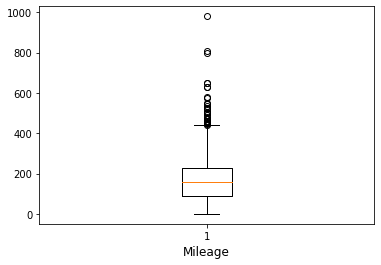

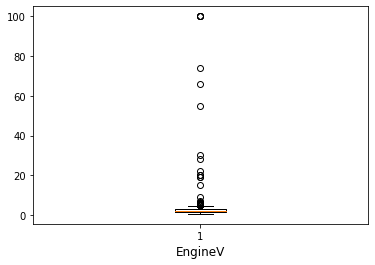

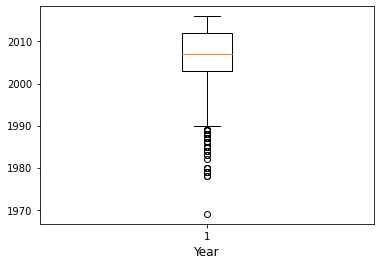

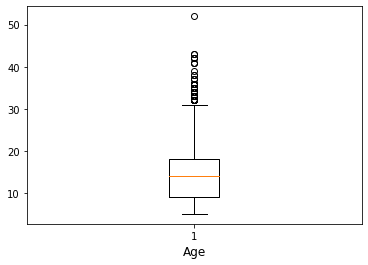

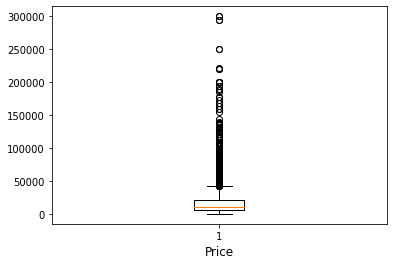

In [ ]:
for i in num:
  plt.figure()
  plt.boxplot(data3[i])
  plt.xlabel(i,fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

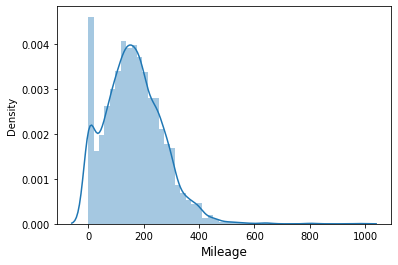

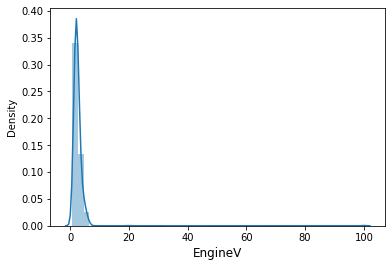

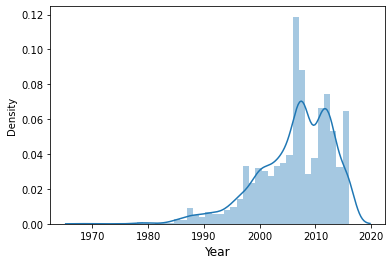

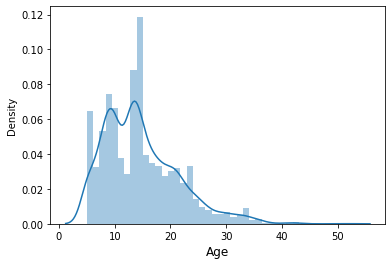

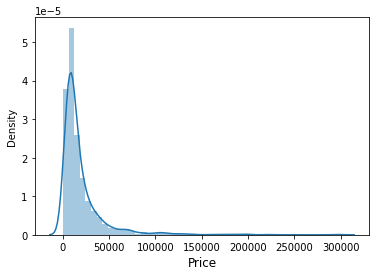

In [ ]:
for i in num:
  plt.figure()
  sns.distplot(data3[i]) 
  plt.xlabel(i,fontsize=12);

In [ ]:
data3.loc[data3['Mileage']>600]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
502,BMW,30500.0,sedan,630,2.5,Petrol,yes,2010,523,11,57.272727
1696,Mercedes-Benz,8500.0,van,630,2.9,Diesel,yes,1998,Sprinter 312,23,27.391304
2443,Mercedes-Benz,68700.0,crossover,980,3.0,Diesel,yes,2013,GL 350,8,122.500000
2900,Volkswagen,20500.0,hatch,800,2.0,Diesel,yes,2013,Golf VII,8,100.000000
3021,Mercedes-Benz,9500.0,other,650,2.2,Diesel,yes,2005,Sprinter 313,16,40.625000
3248,Volkswagen,3200.0,other,650,1.9,Diesel,yes,1999,Caddy,22,29.545455
3408,Toyota,47700.0,crossover,810,4.7,Gas,yes,2010,Land Cruiser 200,11,73.636364


In [ ]:
cek.describe()

,Price,Mileage,EngineV,Year,Age,Mileage/Year
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,30530.699401,183.240719,3.291210,2005.789222,15.210778,11.498620
std,43486.055716,120.480536,5.212225,7.105821,7.105821,7.381966
min,1200.000000,0.000000,0.600000,1969.000000,5.000000,0.000000
25%,7738.500000,96.500000,2.200000,2001.000000,10.000000,7.477273
50%,14100.000000,185.000000,2.600000,2007.000000,14.000000,11.642857
75%,31250.000000,256.000000,3.200000,2011.000000,20.000000,15.384615
max,300000.000000,980.000000,99.990000,2016.000000,52.000000,122.500000


In [ ]:
cek=data3.loc[data3['Brand']=='Mercedes-Benz']
cek.loc[cek['Price']<10000]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212,22,19.409091
37,Mercedes-Benz,9800.0,van,230,2.15,Diesel,yes,2004,Vito,17,13.529412
40,Mercedes-Benz,9600.0,van,30,2.20,Diesel,yes,2006,Vito,15,2.000000
50,Mercedes-Benz,9200.0,van,266,2.20,Diesel,yes,2008,Vito,13,20.461538
61,Mercedes-Benz,9999.0,van,127,2.20,Diesel,yes,2005,Vito,16,7.937500
...,...,...,...,...,...,...,...,...,...,...,...
4023,Mercedes-Benz,9999.0,sedan,80,2.30,Petrol,yes,2002,C-Class,19,4.210526
4035,Mercedes-Benz,6900.0,vagon,235,2.90,Diesel,yes,1997,E-Class,24,9.791667
4066,Mercedes-Benz,5500.0,sedan,440,2.00,Petrol,yes,1978,E-Class,43,10.232558
4072,Mercedes-Benz,8200.0,sedan,280,2.40,Gas,yes,1997,E-Class,24,11.666667


### Remove Outlier Common Sense

In [ ]:
# maximum engine v 8.4
#https://www.hotcars.com/biggest-production-car-engines/

In [ ]:
data3.loc[data3['EngineV']>8.4]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
240,Mercedes-Benz,5500.0,sedan,100,99.99,Petrol,yes,2007,S 550,14,7.142857
506,Audi,1950.0,sedan,320,19.00,Other,no,1996,A4,25,12.800000
594,Renault,4800.0,van,113,15.00,Diesel,yes,2006,Kangoo,15,7.533333
877,BMW,6800.0,crossover,242,99.99,Diesel,no,2005,X3,16,15.125000
1123,BMW,25000.0,crossover,150,30.00,Petrol,yes,2007,X5,14,10.714286
1137,BMW,3300.0,sedan,233,28.00,Petrol,no,1997,528,24,9.708333
1194,BMW,3000.0,sedan,350,99.99,Other,yes,1992,520,29,12.068966
1198,Renault,2750.0,hatch,186,22.00,Diesel,no,2005,Laguna,16,11.625000
1237,Volkswagen,4800.0,sedan,190,99.99,Petrol,yes,1998,Passat B5,23,8.260870
1343,Mercedes-Benz,6500.0,sedan,215,55.00,Petrol,no,2001,S 55,20,10.750000


In [ ]:
engine_outlier=data3.loc[data3['EngineV']>8.4]
engine_outlier.reset_index(inplace=True)
engine_outlier

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
0,240,Mercedes-Benz,5500.0,sedan,100,99.99,Petrol,yes,2007,S 550,14,7.142857
1,506,Audi,1950.0,sedan,320,19.00,Other,no,1996,A4,25,12.800000
2,594,Renault,4800.0,van,113,15.00,Diesel,yes,2006,Kangoo,15,7.533333
3,877,BMW,6800.0,crossover,242,99.99,Diesel,no,2005,X3,16,15.125000
4,1123,BMW,25000.0,crossover,150,30.00,Petrol,yes,2007,X5,14,10.714286
5,1137,BMW,3300.0,sedan,233,28.00,Petrol,no,1997,528,24,9.708333
6,1194,BMW,3000.0,sedan,350,99.99,Other,yes,1992,520,29,12.068966
7,1198,Renault,2750.0,hatch,186,22.00,Diesel,no,2005,Laguna,16,11.625000
8,1237,Volkswagen,4800.0,sedan,190,99.99,Petrol,yes,1998,Passat B5,23,8.260870
9,1343,Mercedes-Benz,6500.0,sedan,215,55.00,Petrol,no,2001,S 55,20,10.750000


In [ ]:
data3.loc[(data3['Brand']=='Renault')&
  (data3['Body']=='van')&(data3['Engine Type']=='Diesel')&(data3['Year']==2006)&
  (data3['Model']=='Kangoo')]
  #harusnya 15 jadi 1.5

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
594,Renault,4800.0,van,113,15.0,Diesel,yes,2006,Kangoo,15,7.533333
1385,Renault,4900.0,van,218,1.5,Diesel,yes,2006,Kangoo,15,14.533333


In [ ]:
eng_out=[]
for i in range(len(engine_outlier)):
  fill=data3.loc[(data3['Brand']==engine_outlier['Brand'][i])&
  (data3['Body']==engine_outlier['Body'][i])&(data3['Engine Type']==engine_outlier['Engine Type'][i])&(data3['Year']==engine_outlier['Year'][i])&
  (data3['Model']==engine_outlier['Model'][i]),'EngineV'].mode(dropna=False)[0]
  eng_out.append(fill)

In [ ]:
engine_outlier['EngineV']=eng_out
engine_outlier=engine_outlier.loc[engine_outlier['EngineV']<=8.4]
engine_outlier.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
engine_outlier

,level_0,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
0,0,240,Mercedes-Benz,5500.0,sedan,100,5.5,Petrol,yes,2007,S 550,14,7.142857
1,1,506,Audi,1950.0,sedan,320,1.6,Other,no,1996,A4,25,12.800000
2,2,594,Renault,4800.0,van,113,1.5,Diesel,yes,2006,Kangoo,15,7.533333
3,4,1123,BMW,25000.0,crossover,150,4.8,Petrol,yes,2007,X5,14,10.714286
4,5,1137,BMW,3300.0,sedan,233,2.8,Petrol,no,1997,528,24,9.708333
5,8,1237,Volkswagen,4800.0,sedan,190,1.8,Petrol,yes,1998,Passat B5,23,8.260870
6,10,1701,Volkswagen,10800.0,sedan,63,2.0,Petrol,yes,2007,Passat B6,14,4.500000
7,13,2037,Renault,6100.0,van,280,1.5,Diesel,yes,2008,Kangoo,13,21.538462
8,14,2205,Volkswagen,2400.0,sedan,268,1.8,Petrol,yes,1989,Passat B3,32,8.375000
9,16,2982,Volkswagen,11350.0,van,190,2.0,Diesel,yes,2011,T5 (Transporter),10,19.000000


In [ ]:
for j,i in enumerate(engine_outlier['index']):
  data3.iloc[i:i+1,4:5]=engine_outlier['EngineV'][j]

In [ ]:
data3=data3.loc[data3['EngineV']<=8.4]
data3.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,30,9.233333
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,22,19.409091
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,18,19.888889
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,14,17.142857
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,10,12.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


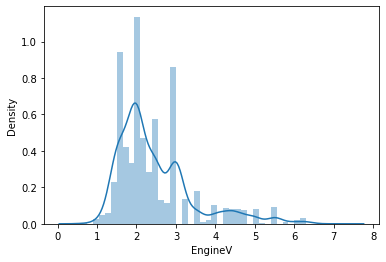

In [ ]:
sns.distplot(data3['EngineV'])

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4083 entries, 0 to 4091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4083 non-null   object 
 1   Price         4083 non-null   float64
 2   Body          4083 non-null   object 
 3   Mileage       4083 non-null   int64  
 4   EngineV       4083 non-null   float64
 5   Engine Type   4083 non-null   object 
 6   Registration  4083 non-null   object 
 7   Year          4083 non-null   int64  
 8   Model         4083 non-null   object 
 9   Age           4083 non-null   int64  
 10  Mileage/Year  4083 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 382.8+ KB


In [ ]:
data3[data3['Mileage']==0]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
5,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016,GLS 63,5,0.0
19,Toyota,38233.00,other,0,2.40,Diesel,yes,2016,Hilux,5,0.0
97,Mercedes-Benz,107999.00,crossover,0,2.98,Diesel,yes,2016,GLS 350,5,0.0
119,Toyota,195000.00,crossover,0,4.50,Diesel,yes,2016,Land Cruiser 200,5,0.0
133,Mercedes-Benz,87777.00,van,0,2.20,Diesel,yes,2016,V 250,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4022,Mercedes-Benz,109999.00,crossover,0,2.98,Diesel,yes,2016,GLS 350,5,0.0
4025,Mercedes-Benz,111999.00,crossover,0,3.00,Diesel,yes,2016,GL 350,5,0.0
4037,Toyota,17394.09,hatch,0,1.33,Petrol,yes,2016,Yaris,5,0.0
4069,Toyota,100000.00,crossover,0,4.50,Diesel,yes,2016,Land Cruiser 200,5,0.0


In [ ]:
data3=data3[data3['Mileage']>0]

In [ ]:
data3.describe()

,Price,Mileage,EngineV,Year,Age,Mileage/Year
count,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000,3936.000000
mean,17339.103704,170.018801,2.458486,2006.019309,14.980691,11.254784
std,21469.132636,100.296816,0.969277,6.535535,6.535535,5.649265
min,600.000000,1.000000,0.600000,1969.000000,5.000000,0.023810
25%,6900.000000,99.000000,1.800000,2002.000000,10.000000,8.214286
50%,10999.000000,161.000000,2.200000,2007.000000,14.000000,11.200000
75%,20001.750000,232.250000,3.000000,2011.000000,19.000000,14.277778
max,300000.000000,980.000000,7.200000,2016.000000,52.000000,122.500000


In [ ]:
data3=data3.loc[data3['Year']>1969]

In [ ]:
data3=data3.loc[data3['Mileage']>0]

In [ ]:
data3=data3.loc[data3['Mileage']<=500]

In [ ]:
data3.reset_index(inplace=True)
data3.drop(columns=['index'],inplace=True)
mile_outlier=data3[data3['Mileage']<10]
mile_outlier

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
5,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016,GLS 63,5,0.000000
19,Toyota,38233.00,other,0,2.40,Diesel,yes,2016,Hilux,5,0.000000
28,Audi,2900.00,sedan,1,2.30,Gas,yes,1989,100,32,0.031250
35,BMW,67500.00,crossover,1,2.50,Diesel,yes,2016,X5,5,0.200000
57,BMW,133000.00,crossover,7,4.40,Petrol,yes,2015,X5 M,6,1.166667
...,...,...,...,...,...,...,...,...,...,...,...
4027,Toyota,17394.09,hatch,0,1.33,Petrol,yes,2016,Yaris,5,0.000000
4059,Toyota,100000.00,crossover,0,4.50,Diesel,yes,2016,Land Cruiser 200,5,0.000000
4064,Audi,80999.00,crossover,0,3.00,Diesel,yes,2016,Q7,5,0.000000
4077,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350,7,1.285714


In [ ]:
data3.iloc[4020:4020+1,3:4]

,Mileage
4020,74


In [ ]:
mile_max=[]
for i in range (len(mile_outlier)):
  mile_max.append(data3['Mileage'].median())

In [ ]:
mile_outlier['Mileage']=mile_max
mile_outlier.reset_index(inplace=True)
mile_outlier.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
0,5,Mercedes-Benz,199999.0,crossover,158.0,5.5,Petrol,yes,2016,GLS 63,5,0.000000
1,19,Toyota,38233.0,other,158.0,2.4,Diesel,yes,2016,Hilux,5,0.000000
2,28,Audi,2900.0,sedan,158.0,2.3,Gas,yes,1989,100,32,0.031250
3,35,BMW,67500.0,crossover,158.0,2.5,Diesel,yes,2016,X5,5,0.200000
4,57,BMW,133000.0,crossover,158.0,4.4,Petrol,yes,2015,X5 M,6,1.166667


In [ ]:
for j,i in enumerate(mile_outlier['index']):
  data3.iloc[i:i+1,3:4]=mile_outlier['Mileage'][j]

In [ ]:
data3[data3['Mileage']<10]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year


In [ ]:
data3=data3.loc[data3['Price']<250000]
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4077 entries, 0 to 4081
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4077 non-null   object 
 1   Price         4077 non-null   float64
 2   Body          4077 non-null   object 
 3   Mileage       4077 non-null   float64
 4   EngineV       4077 non-null   float64
 5   Engine Type   4077 non-null   object 
 6   Registration  4077 non-null   object 
 7   Year          4077 non-null   int64  
 8   Model         4077 non-null   object 
 9   Age           4077 non-null   int64  
 10  Mileage/Year  4077 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 382.2+ KB


In [ ]:
data3.loc[data3['Price']>200000]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year
1622,Mercedes-Benz,300000.0,sedan,68,6.0,Petrol,yes,2011,S 600,10,6.800000
2053,Mercedes-Benz,249999.0,other,3,5.5,Petrol,yes,2016,S 63 AMG,5,0.600000
2106,Mercedes-Benz,250000.0,other,6,5.5,Petrol,yes,2016,S 63 AMG,5,1.200000
2965,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S-Guard,10,2.900000
3428,Mercedes-Benz,219900.0,crossover,33,5.5,Petrol,yes,2013,G 63 AMG,8,4.125000
3811,Mercedes-Benz,219900.0,crossover,30,6.3,Petrol,yes,2013,G 63 AMG,8,3.750000
3863,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S 600,10,2.900000
4065,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500,9,4.111111


### Remove Outlier dengan IQR

In [ ]:
#Cara remove outlier pake boxplot
data3=data3.loc[data3['Year']<=1990]

In [ ]:
data3=data3.loc[data3['Price']<=150000]

In [ ]:
Q1 = data3.quantile(0.25)
Q3 = data3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Price           14563.500000
Mileage           140.000000
EngineV             1.200000
Year                9.000000
Age                 9.000000
Mileage/Year        6.365079
dtype: float64


In [ ]:
Q1

Price           1974.500000
Mileage          145.000000
EngineV            1.600000
Year            1986.000000
Age               32.000000
Mileage/Year       3.801587
Name: 0.25, dtype: float64

In [ ]:
Q3

Price           3300.00000
Mileage          338.50000
EngineV            2.30000
Year            1989.00000
Age               35.00000
Mileage/Year      10.22234
Name: 0.75, dtype: float64

In [ ]:
Q3[2]

2.3

In [ ]:
#Cara remove outlier pake IQR
data3=data3.loc[data3['Price']<=(Q3[0]+1.5*IQR[0])]
data3=data3.loc[data3['Mileage']<=(Q3[1]+1.5*IQR[1])]
data3=data3.loc[data3['EngineV']<=(Q3[2]+1.5*IQR[2])]
data3=data3.loc[data3['Year']>=(Q1[3]-1.5*IQR[3])]

In [ ]:
data3.loc[data3['Year']<1980]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

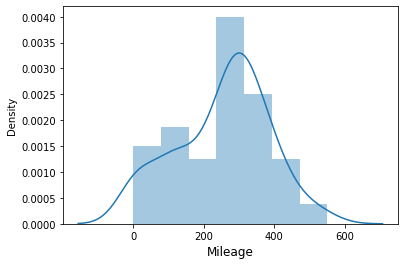

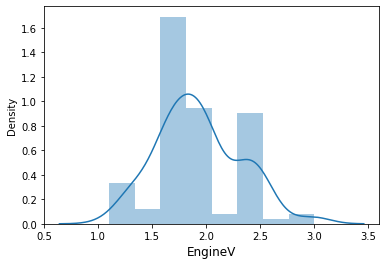

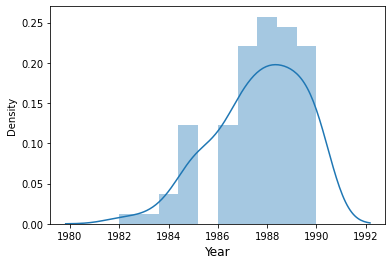

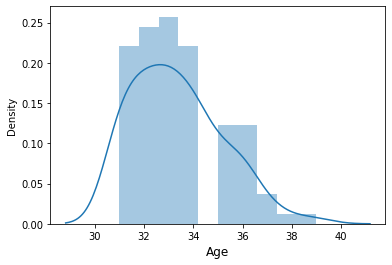

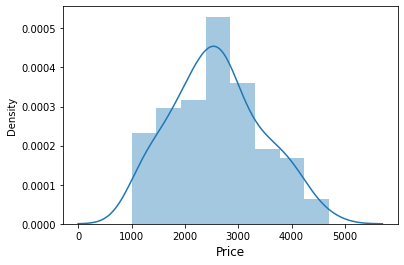

In [ ]:
for i in num:
  plt.figure()
  sns.distplot(data3[i]) 
  plt.xlabel(i,fontsize=12);

## Description Analysis


In [ ]:
data4=data3.copy()

In [ ]:
data4.describe()

,Price,Mileage,EngineV,Year,Age,Mileage/Year
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000
mean,19417.875601,164.039589,2.757627,2006.365103,14.634897,10.852125
std,25642.642488,103.445825,4.896500,6.673745,6.673745,5.925044
min,600.000000,0.000000,0.600000,1969.000000,5.000000,0.000000
25%,6999.000000,90.000000,1.800000,2003.000000,9.000000,7.777778
50%,11500.000000,158.500000,2.200000,2007.000000,14.000000,11.000000
75%,21562.500000,230.000000,3.000000,2012.000000,18.000000,14.142857
max,300000.000000,980.000000,99.990000,2016.000000,52.000000,122.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


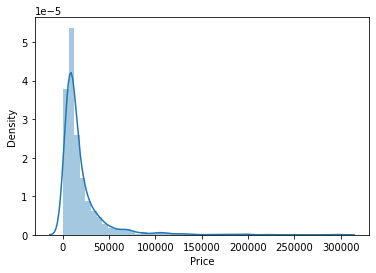

In [ ]:
sns.distplot(data4['Price'])

In [ ]:
def value_counts(df, col, style=True):
    table = df[col].value_counts().rename_axis('Value').reset_index(name='Count')
    table['Percentage'] = table['Count'] / table['Count'].sum(axis=0)
    
    if style:
        table = table.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'}).hide_index()
        
    return table

In [ ]:
value_counts(data4,'Brand')

Value,Count,Percentage
Volkswagen,891,21.77%
Mercedes-Benz,835,20.41%
BMW,652,15.93%
Toyota,522,12.76%
Renault,450,11.00%
Audi,428,10.46%
Mitsubishi,314,7.67%


In [ ]:
value_counts(data4,'Body')

Value,Count,Percentage
sedan,"1,568",38.32%
crossover,832,20.33%
van,634,15.49%
other,401,9.80%
vagon,387,9.46%
hatch,270,6.60%


In [ ]:
value_counts(data4,'Engine Type')

Value,Count,Percentage
Diesel,"1,889",46.16%
Petrol,"1,495",36.53%
Gas,599,14.64%
Other,109,2.66%


In [ ]:
value_counts(data4,'Registration')

Value,Count,Percentage
yes,"3,713",90.74%
no,379,9.26%


In [ ]:
value_counts(data4,'Year')

Value,Count,Percentage
2008,403,9.85%
2012,341,8.33%
2007,339,8.28%
2011,304,7.43%
2013,245,5.99%
2016,209,5.11%
2006,205,5.01%
2005,181,4.42%
2010,172,4.20%
2004,160,3.91%


In [ ]:
value_counts(data4,'Model')

Value,Count,Percentage
E-Class,190,4.64%
A6,164,4.01%
Vito,162,3.96%
Kangoo,139,3.40%
Camry,131,3.20%
Caddy,113,2.76%
X5,112,2.74%
Megane,86,2.10%
Land Cruiser Prado,76,1.86%
520,76,1.86%


In [ ]:
above2000=[]
for i in data4['Year']:
  if i >=2000:
    above2000.append(1)
  else:
    above2000.append(0)
data4['Above 2000']=above2000

In [ ]:
data4['Above 2000'].value_counts()

1    3486
0     606
Name: Above 2000, dtype: int64

In [ ]:
brand_summary=data4.groupby(['Brand'])[['Price']].mean().sort_values(by='Price',ascending=False)
brand_summary.reset_index(inplace=True)
brand_summary.columns=['Brand','Mean Price']
brand_summary

,Brand,Mean Price
0,Mercedes-Benz,30530.699401
1,BMW,23510.788727
2,Toyota,22565.532969
3,Audi,18661.841121
4,Volkswagen,13088.258451
5,Mitsubishi,11403.491401
6,Renault,8059.928711


In [ ]:
engtype_summary=data4.groupby(['Engine Type'])[['Price']].mean().sort_values(by='Price',ascending=False)
engtype_summary.reset_index(inplace=True)
engtype_summary.columns=['Engine Type','Mean Price']
engtype_summary

,Engine Type,Mean Price
0,Petrol,21686.476682
1,Diesel,20190.904299
2,Other,14178.944954
3,Gas,12271.354090


In [ ]:
regis_summary=data4.groupby(['Registration'])[['Price']].mean().sort_values(by='Price',ascending=False)
regis_summary.reset_index(inplace=True)
regis_summary.columns=['Registration','Mean Price']
regis_summary

,Registration,Mean Price
0,yes,20971.684072
1,no,4195.472296


In [ ]:
data_dict = {'no': 0, 'yes': 1}
data4['Registration'] = data4['Registration'].map(data_dict)
data4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year,Above 2000
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991,320,30,9.233333,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999,Sprinter 212,22,19.409091,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,1,2003,S 500,18,19.888889,1
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007,Q7,14,17.142857,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011,Rav 4,10,12.000000,1


In [ ]:
brandmodel_summary=data4.groupby(['Brand','Model'])[['Price']].mean().sort_values(by='Price',ascending=False)
brandmodel_summary.reset_index(inplace=True)
brandmodel_summary.columns=['Brand','Model','Mean Price']
brandmodel_summary

,Brand,Model,Mean Price
0,Mercedes-Benz,S-Guard,295000.000000
1,Mercedes-Benz,Sprinter 324,200000.000000
2,Mercedes-Benz,GLS 63,195332.666667
3,Mercedes-Benz,G 63 AMG,155012.833333
4,Mercedes-Benz,S 63 AMG,143433.166667
...,...,...,...
302,Renault,21,1350.000000
303,Volkswagen,T2 (Transporter),1300.000000
304,Renault,9,1200.000000
305,Renault,5,1150.000000


In [ ]:
brandmodel=pd.DataFrame(columns=['Brand','Model','Mean Price'])
for i in (pd.unique(brandmodel_summary['Brand'])):
  brandmodel=brandmodel.append(brandmodel_summary.loc[brandmodel_summary['Brand']==i].sort_values(by='Mean Price',ascending=False).head(3))

In [ ]:
brandmodel
#3 brand dan model dengan rata-rata tertinggi

,Brand,Model,Mean Price
0,Mercedes-Benz,S-Guard,295000.000000
1,Mercedes-Benz,Sprinter 324,200000.000000
2,Mercedes-Benz,GLS 63,195332.666667
14,BMW,6 Series Gran Coupe,85555.000000
15,BMW,X6 M,84849.750000
17,BMW,M6,77000.000000
16,Toyota,Land Cruiser 200,79582.461538
25,Toyota,Land Cruiser 76,63000.000000
43,Toyota,4Runner,42000.000000
21,Audi,R8,72950.000000


In [ ]:
year_summary=data4.groupby(['Year'])[['Price']].mean().sort_values(by='Price',ascending=False)
year_summary.reset_index(inplace=True)
year_summary.columns=['Year','Mean Price']
year_summary

,Year,Mean Price
0,2016,72378.112775
1,2015,58287.821705
2,2014,41375.078378
3,1969,34999.000000
4,2013,31201.832653
5,2011,24688.493421
6,2010,22295.308140
7,2012,21523.992757
8,2009,18836.538462
9,2008,16226.975186


In [ ]:
above2000_summary=data4.groupby(['Above 2000'])[['Price']].mean().sort_values(by='Price',ascending=False)
above2000_summary.reset_index(inplace=True)
above2000_summary.columns=['Above 2000','Mean Price']
above2000_summary

,Above 2000,Mean Price
0,1,21999.204779
1,0,4568.843399


In [ ]:
above2000_summary=data4.groupby(['Above 2000','Registration'])[['Price']].count()
above2000_summary.reset_index()
#ini buat kesimpulan

,Above 2000,Registration,Price
0,0,0,122
1,0,1,484
2,1,0,257
3,1,1,3229


In [ ]:
dummy=data4.copy()

In [ ]:
dummy=dummy[['Brand','Body','Engine Type']]
dummy=pd.get_dummies(dummy,drop_first=True)
dummy.head()

,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Yang di drop:\
-Brand: Audi\
-Body: Crossover\
-Engine Type: Diesel

In [ ]:
data4=pd.concat([data4,dummy],ignore_index=False,axis=1)
data4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year,Above 2000,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991,320,30,9.233333,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999,Sprinter 212,22,19.409091,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,1,2003,S 500,18,19.888889,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007,Q7,14,17.142857,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011,Rav 4,10,12.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,1,2014,S 350,7,1.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4088,BMW,6500.0,sedan,1,3.5,Petrol,1,1999,535,22,0.045455,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4089,BMW,8000.0,sedan,194,2.0,Petrol,1,1985,520,36,5.388889,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4090,Toyota,14200.0,sedan,31,1.6,Petrol,1,2014,Corolla,7,4.428571,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


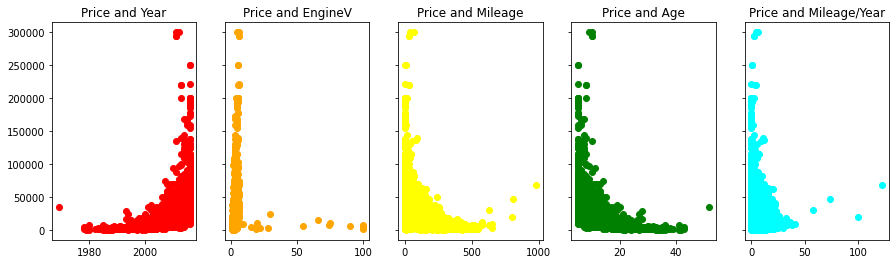

In [ ]:
#dari price terhadap var x nya ga linear, makanya harus di transform dulu pake log

fig, ax = plt.subplots(1, 5, sharey=True, figsize =(15,4))
ax[0].scatter(data4['Year'],data4['Price'],color='red')
ax[0].set_title('Price and Year')
ax[1].scatter(data4['EngineV'],data4['Price'],color='orange')
ax[1].set_title('Price and EngineV')
ax[2].scatter(data4['Mileage'],data4['Price'],color='yellow')
ax[2].set_title('Price and Mileage')
ax[3].scatter(data4['Age'],data4['Price'],color='green')
ax[3].set_title('Price and Age')
ax[4].scatter(data4['Mileage/Year'],data4['Price'],color='cyan')
ax[4].set_title('Price and Mileage/Year');

In [ ]:
def target_boxplot(data, variable, target='Target', plotsize=(8, 8), colors=['green', 'red'], labels=['No', 'Yes'], limits=None):
    fig, ax = plt.subplots(figsize=plotsize)
    
    bp = sns.boxplot(x=target, y=variable, data=data, showmeans=True, meanline=True, 
                     palette=colors, width=0.3,
                     flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='white', alpha=0.5),
                     meanprops=dict(linestyle='-', linewidth=2, color='orange'),
                     medianprops=dict(linestyle='-', linewidth=2, color='white'), 
                     boxprops=dict(linewidth=0, alpha=0.7))
    
    bp.set(xticklabels=labels, ylim=limits)
    
    plt.show()

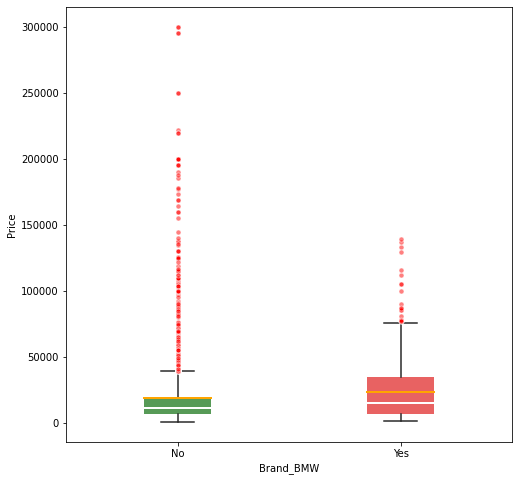

In [ ]:
target_boxplot(data4,'Price',target='Brand_BMW',labels=['No','Yes'])

In [ ]:
data4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Mileage/Year,Above 2000,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991,320,30,9.233333,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999,Sprinter 212,22,19.409091,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,1,2003,S 500,18,19.888889,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007,Q7,14,17.142857,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011,Rav 4,10,12.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,1,2014,S 350,7,1.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4088,BMW,6500.0,sedan,1,3.5,Petrol,1,1999,535,22,0.045455,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4089,BMW,8000.0,sedan,194,2.0,Petrol,1,1985,520,36,5.388889,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4090,Toyota,14200.0,sedan,31,1.6,Petrol,1,2014,Corolla,7,4.428571,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


## Feature Selection

In [ ]:
data5=data4.copy()

In [ ]:
data5.drop(columns=['Brand',
 'Body',
 'Engine Type','Model'],inplace=True)

In [ ]:
data5=data5[[ 'Mileage', 'EngineV', 'Year', 'Age', 'Registration',
       'Mileage/Year', 'Above 2000', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol','Price']]

In [ ]:
def correlation_plot(df, features, plotsize=(16,18), corr_type='pearson', number_format='.1%', fontsize=11):
    corrs = df[features].corr(method=corr_type)
    triangle = np.triu(corrs)

    fig, ax = plt.subplots(figsize=plotsize)
    ax = sns.heatmap(corrs, mask=triangle, annot=True, annot_kws={'size': fontsize}, fmt=number_format, cmap='RdYlGn_r', 
                     cbar_kws={'shrink': 0.8}, vmin=-1, center=0, vmax=1, square=True, linewidths=0.1, linecolor='white')
    plt.show()

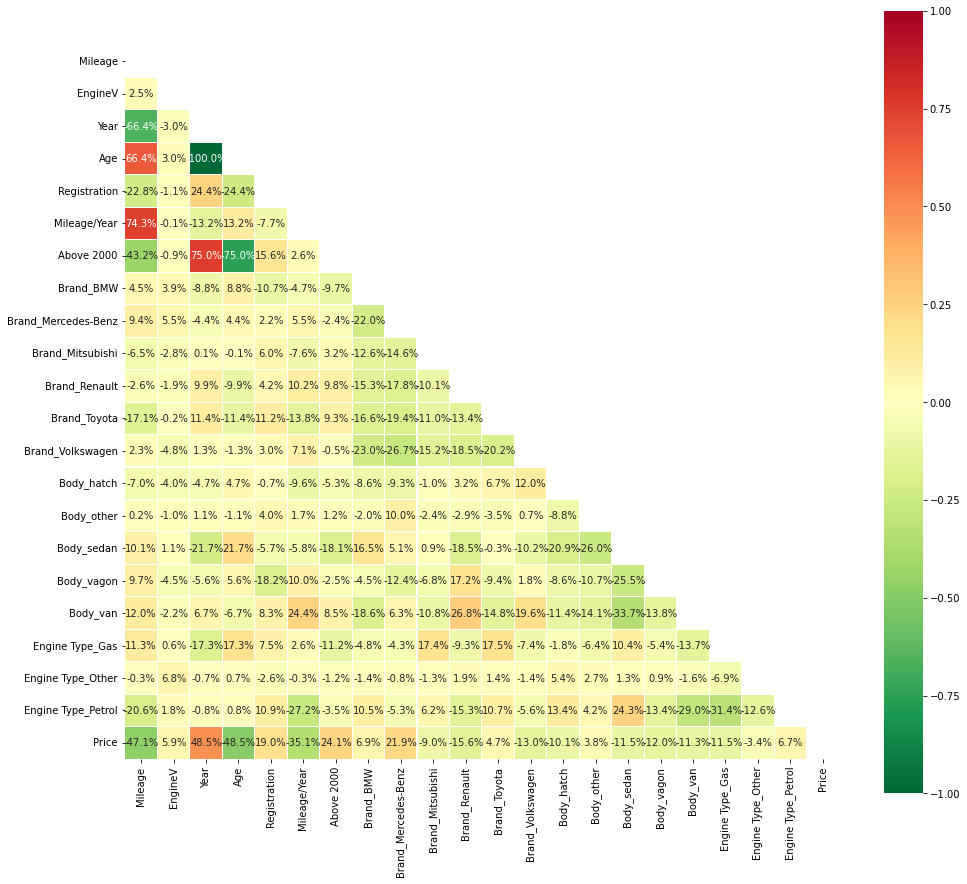

In [ ]:
correlation_plot(data5, data5.columns, fontsize=10)

-threshold 0.7\
-var yang dibuang: year,above 2000,mileage/year

In [ ]:
data5.drop(columns=['Year','Above 2000','Mileage/Year'],inplace=True)

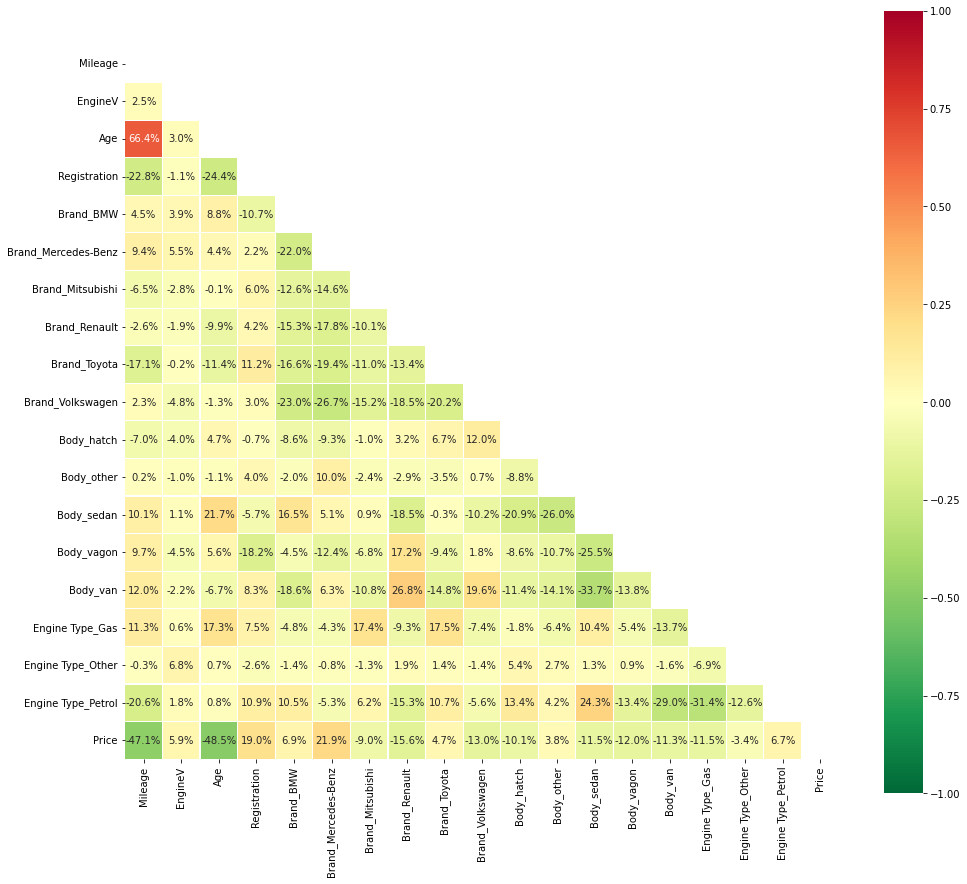

In [ ]:
correlation_plot(data5, data5.columns, fontsize=10)

In [ ]:
data5.columns

Index(['Mileage', 'EngineV', 'Age', 'Registration', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Price'],
      dtype='object')

In [ ]:
ind_var=['Age', 'Mileage', 'EngineV', 'Registration', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

In [ ]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data, features, style=True):
    X = add_constant(data[features])
    vif_values = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
    vif_df = pd.DataFrame({'Variable': features, 'VIF': vif_values})
    vif_df = vif_df.sort_values('VIF', ascending=False).reset_index(drop=True)
    vif_df.index += 1

    if style:
        vif_df = vif_df.style.format({'VIF': '{:,.2f}'})
        
    return vif_df

In [ ]:
vif(data5, ind_var)

,Variable,VIF
1,Brand_Volkswagen,2.65
2,Brand_Mercedes-Benz,2.53
3,Brand_BMW,2.20
4,Brand_Toyota,2.17
5,Body_sedan,2.14
6,Age,2.10
7,Brand_Renault,2.09
8,Body_van,2.08
9,Mileage,2.07
10,Brand_Mitsubishi,1.74


## Preprocessing

### Log independent Var

In [ ]:
data6=data5.copy()
data6.reset_index(inplace=True)
data6.drop(columns=['index'],inplace=True)

In [ ]:
num_vars=['Mileage',
 'EngineV',
 'Age']
for i in num_vars:
  log_var = np.log(data6[i])
  data6['Log'+i] = log_var

In [ ]:
data6.describe()

,Mileage,EngineV,Age,Registration,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Price,LogMileage,LogEngineV,LogAge
count,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000
mean,196.671929,2.448638,14.686976,0.907252,0.160335,0.199063,0.077454,0.109768,0.128022,0.219783,0.066108,0.096448,0.385545,0.095215,0.155402,0.147509,0.026147,0.362358,18104.165259,4.882010,0.831816,2.586020
std,173.748146,0.952295,6.657601,0.290115,0.366962,0.399345,0.267344,0.312639,0.334155,0.414151,0.248501,0.295241,0.486784,0.293547,0.362332,0.354656,0.159592,0.480741,19908.981912,1.165790,0.346279,0.455758
min,1.000000,0.600000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,600.000000,0.000000,-0.510826,1.609438
25%,101.000000,1.800000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6999.000000,4.615121,0.587787,2.302585
50%,166.500000,2.200000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11400.000000,5.114991,0.788457,2.639057
75%,243.000000,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21000.000000,5.493061,1.098612,2.890372
max,980.000000,7.200000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,144900.000000,6.887553,1.974081,3.951244


In [ ]:
from sklearn.preprocessing import StandardScaler

num_vars=['LogMileage','LogEngineV','LogAge']

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(data6[num_vars])
data_scaled = scaler.transform(data6[num_vars])

Text(0.5, 1.0, 'Price and Age')

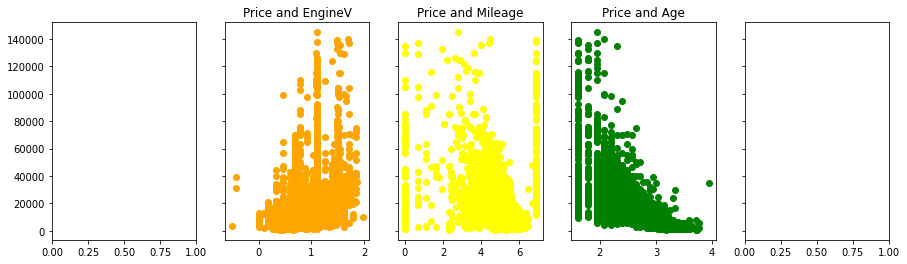

In [ ]:
#dari price terhadap var x nya ga linear, makanya harus di transform dulu pake log

fig, ax = plt.subplots(1, 5, sharey=True, figsize =(15,4))
ax[1].scatter(data6['LogEngineV'],data6['Price'],color='orange')
ax[1].set_title('Price and EngineV')
ax[2].scatter(data6['LogMileage'],data6['Price'],color='yellow')
ax[2].set_title('Price and Mileage')
ax[3].scatter(data6['LogAge'],data6['Price'],color='green')
ax[3].set_title('Price and Age')

In [ ]:
independent=data6.drop(columns=['Price','Mileage','EngineV','Age'])
target=data6['Price']

### Log Dependent Var

In [ ]:
data6=data5.copy()
data6.reset_index(inplace=True)
data6.drop(columns=['index'],inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
num_vars=['Mileage',
 'EngineV',
 'Age']

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(data6[num_vars])
data_scaled = scaler.transform(data6[num_vars])

In [ ]:
data6[['Mileage Scaled','EngineV Scaled','Age Scaled']]=pd.DataFrame(data_scaled,columns=[num_vars])
data6.head()

,Mileage,EngineV,Age,Registration,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Price,Mileage Scaled,EngineV Scaled,Age Scaled
0,277,2.0,30,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4200.0,1.092110,-0.154747,2.302602
1,427,2.9,22,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,7900.0,2.542322,0.029080,1.103728
2,358,5.0,18,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,13300.0,1.875224,0.458010,0.504292
3,240,4.2,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23000.0,0.734391,0.294608,-0.095145
4,120,2.0,10,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,18300.0,-0.425778,-0.154747,-0.694582


In [ ]:
log_price = np.log(data6['Price'])
data6['Log_Price'] = log_price
data6.head()

,Mileage,EngineV,Age,Registration,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Price,Mileage Scaled,EngineV Scaled,Age Scaled,Log_Price
0,277,2.0,30,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4200.0,1.092110,-0.154747,2.302602,8.342840
1,427,2.9,22,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,7900.0,2.542322,0.029080,1.103728,8.974618
2,358,5.0,18,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,13300.0,1.875224,0.458010,0.504292,9.495519
3,240,4.2,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23000.0,0.734391,0.294608,-0.095145,10.043249
4,120,2.0,10,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,18300.0,-0.425778,-0.154747,-0.694582,9.814656


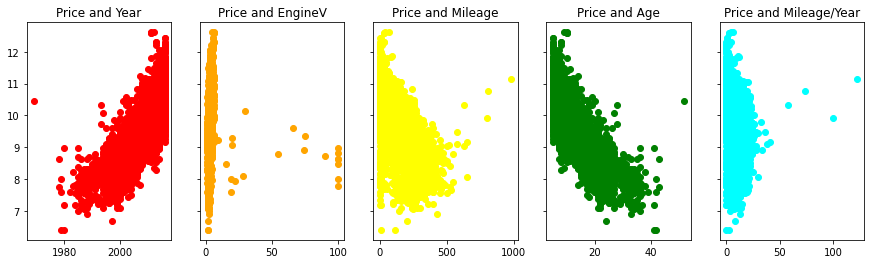

In [ ]:
#dari price terhadap var x nya ga linear, makanya harus di transform dulu pake log

fig, ax = plt.subplots(1, 5, sharey=True, figsize =(15,4))
ax[0].scatter(data4['Year'],data6['Log_Price'],color='red')
ax[0].set_title('Price and Year')
ax[1].scatter(data4['EngineV'],data6['Log_Price'],color='orange')
ax[1].set_title('Price and EngineV')
ax[2].scatter(data4['Mileage'],data6['Log_Price'],color='yellow')
ax[2].set_title('Price and Mileage')
ax[3].scatter(data4['Age'],data6['Log_Price'],color='green')
ax[3].set_title('Price and Age')
ax[4].scatter(data4['Mileage/Year'],data6['Log_Price'],color='cyan')
ax[4].set_title('Price and Mileage/Year');

In [ ]:
independent=data6.drop(columns=['Price','Log_Price'])
target=data6['Log_Price']

## Modeling
ga buang outlier



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size=0.2,random_state=0)
print('Train size:', x_train.shape)
print('Test size:', x_test.shape)

Train size: (3273, 17)
Test size: (819, 17)


In [ ]:
import statsmodels.api as sm

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train.drop(columns=['Mileage','EngineV','Age']))
result1 = sm.OLS(y_train,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     886.1
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:53:57   Log-Likelihood:                -1504.4
No. Observations:                3273   AIC:                             3047.
Df Residuals:                    3254   BIC:                             3163.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2096      0.033    275.466      0.000       9.144       9.275
Registration            0.9088      0.025     35.763      0.000       0.859       0.959
Brand_BMW               0.1029      0.027      3.838      0.000       0.050       0.156
Brand_Mercedes-Benz     0.1518      0.027      5.726      0.000       0.100       0.204
Brand_Mitsubishi       -0.6363      0.033    -19.256      0.000      -0.701      -0.572
Brand_Renault          -0.8097      0.031    -26.399      0.000      -0.870      -0.750
Brand_Toyota           -0.2530      0.030     -8.562      0.000      -0.311      -0.195
Brand_Volkswagen       -0.3479      0.026    -13.299      0.000      -0.399      -0.297
Body_hatch             -0.6635      0.033    -20.350      0.000      -0.727      -0.600
Body_other             -0.3623      0.027    -13.204      0.000      -0.416      -0.308
Body_sedan             -0.4721      0.020    -23.481      0.000      -0.511      -0.433
Body_vagon             -0.5056      0.029    -17.329      0.000      -0.563      -0.448
Body_van               -0.6105      0.026    -23.174      0.000      -0.662      -0.559
Engine Type_Gas        -0.0629      0.023     -2.751      0.006      -0.108      -0.018
Engine Type_Other      -0.0767      0.043     -1.773      0.076      -0.162       0.008
Engine Type_Petrol     -0.0462      0.018     -2.559      0.011      -0.082      -0.011
Mileage Scaled         -0.1094      0.010    -11.193      0.000      -0.129      -0.090
EngineV Scaled          0.0180      0.006      2.902      0.004       0.006       0.030
Age Scaled             -0.5512      0.010    -56.024      0.000      -0.570      -0.532
==============================================================================
Omnibus:                      716.138   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5442.306
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       9.095   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
independent.drop(columns=['Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','EngineV Scaled'],inplace=True)

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train.drop(columns=['Mileage','EngineV','Age']))
result1 = sm.OLS(y_train,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1133.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:54:41   Log-Likelihood:                -1513.7
No. Observations:                3273   AIC:                             3057.
Df Residuals:                    3258   BIC:                             3149.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2037      0.033    275.693      0.000       9.138       9.269
Registration            0.8937      0.025     35.851      0.000       0.845       0.943
Brand_BMW               0.1033      0.027      3.847      0.000       0.051       0.156
Brand_Mercedes-Benz     0.1555      0.027      5.859      0.000       0.103       0.207
Brand_Mitsubishi       -0.6552      0.033    -20.113      0.000      -0.719      -0.591
Brand_Renault          -0.8052      0.031    -26.242      0.000      -0.865      -0.745
Brand_Toyota           -0.2690      0.029     -9.239      0.000      -0.326      -0.212
Brand_Volkswagen       -0.3466      0.026    -13.234      0.000      -0.398      -0.295
Body_hatch             -0.6808      0.032    -21.276      0.000      -0.744      -0.618
Body_other             -0.3694      0.027    -13.559      0.000      -0.423      -0.316
Body_sedan             -0.4875      0.020    -24.968      0.000      -0.526      -0.449
Body_vagon             -0.5079      0.029    -17.467      0.000      -0.565      -0.451
Body_van               -0.6009      0.026    -23.188      0.000      -0.652      -0.550
Mileage Scaled         -0.1050      0.010    -10.993      0.000      -0.124      -0.086
Age Scaled             -0.5571      0.010    -57.970      0.000      -0.576      -0.538
==============================================================================
Omnibus:                      723.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5312.367
Skew:                           0.851   Prob(JB):                         0.00
Kurtosis:                       9.005   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train.drop(columns=['Mileage','EngineV','Age']),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat_test= reg.predict(x_test.drop(columns=['Mileage','EngineV','Age']))

In [ ]:
r2=reg.score(x_test.drop(columns=['Mileage','EngineV','Age']),y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8481260626462093

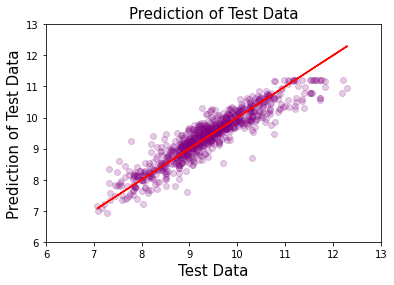

In [ ]:
plt.plot(y_test,y_test,color='red')
plt.title('Prediction of Test Data',fontsize=15)
plt.scatter(y_test,y_hat_test,color='purple',alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.xlabel('Test Data',fontsize=15)
plt.ylabel('Prediction of Test Data',fontsize=15)
plt.show()

In [ ]:
predict1 = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
predict1['Target'] = np.exp(y_test)
predict1

,Prediction,Target
0,6220.254794,5200.0
1,6715.634804,9300.0
2,9777.640094,11500.0
3,2815.618411,1950.0
4,18615.636947,10400.0
...,...,...
814,70945.214026,137000.0
815,5180.625067,7000.0
816,6050.240813,7300.0
817,18254.224303,16800.0


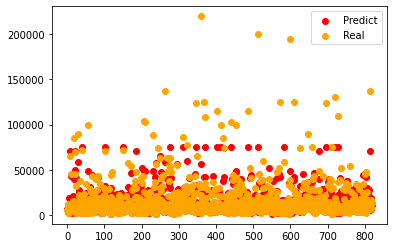

In [ ]:
plt.scatter(predict1.index,predict1['Prediction'],label='Predict',color='red')
plt.scatter(predict1.index,predict1['Target'],label='Real',color='orange')
plt.legend()

In [ ]:
predict1['Residual'] = predict1['Target'] - predict1['Prediction']
predict1['Difference%'] = np.absolute(predict1['Residual']/predict1['Target']*100)
predict1.sort_values(by=['Difference%']).tail()

,Prediction,Target,Residual,Difference%
466,4192.588195,1500.0,-2692.588195,179.505880
192,29944.660585,10550.0,-19394.660585,183.835645
666,5453.328853,1850.0,-3603.328853,194.774533
528,12210.370117,3800.0,-8410.370117,221.325529
301,10203.389095,2400.0,-7803.389095,325.141212


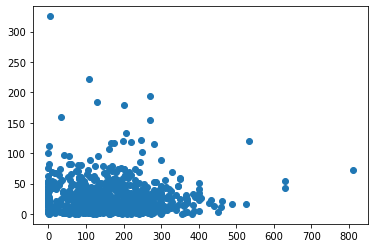

In [ ]:
plt.scatter(x_test['Mileage'],predict1['Difference%'])

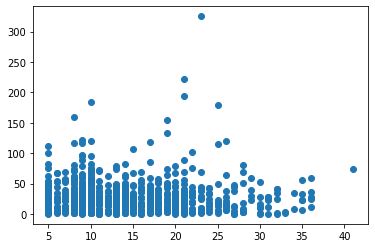

In [ ]:
plt.scatter(x_test['Age'],predict1['Difference%'])

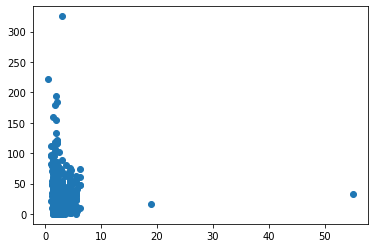

In [ ]:
plt.scatter(x_test['EngineV'],predict1['Difference%'])

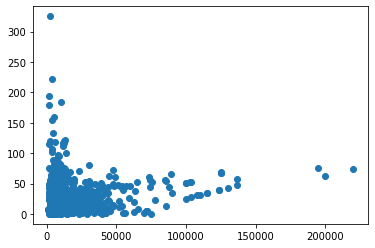

In [ ]:
plt.scatter(predict1['Target'],predict1['Difference%'])

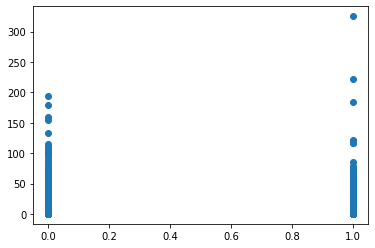

In [ ]:
plt.scatter(x_test['Brand_Mercedes-Benz'],predict1['Difference%'])

In [ ]:
#Mape
predict1['Difference%'].mean()

27.24139639359049

## Modeling Eval 1
buang outlier pake IQR


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size=0.2,random_state=0)
print('Train size:', x_train.shape)
print('Test size:', x_test.shape)

Train size: (2774, 18)
Test size: (694, 18)


In [ ]:
import statsmodels.api as sm

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train.drop(columns=['Mileage','EngineV','Age']))
result1 = sm.OLS(y_train,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     936.8
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:51:31   Log-Likelihood:                -298.93
No. Observations:                2774   AIC:                             635.9
Df Residuals:                    2755   BIC:                             748.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.9567      0.027    332.862      0.000       8.904       9.009
Registration            0.8640      0.019     46.559      0.000       0.828       0.900
Brand_BMW               0.0484      0.021      2.294      0.022       0.007       0.090
Brand_Mercedes-Benz    -0.0345      0.021     -1.629      0.104      -0.076       0.007
Brand_Mitsubishi       -0.4288      0.025    -16.892      0.000      -0.479      -0.379
Brand_Renault          -0.5698      0.024    -23.658      0.000      -0.617      -0.523
Brand_Toyota           -0.1730      0.023     -7.614      0.000      -0.218      -0.128
Brand_Volkswagen       -0.2085      0.020    -10.250      0.000      -0.248      -0.169
Body_hatch             -0.3786      0.028    -13.577      0.000      -0.433      -0.324
Body_other             -0.2275      0.023     -9.962      0.000      -0.272      -0.183
Body_sedan             -0.2760      0.018    -15.485      0.000      -0.311      -0.241
Body_vagon             -0.3188      0.024    -13.381      0.000      -0.366      -0.272
Body_van               -0.4201      0.023    -18.660      0.000      -0.464      -0.376
Engine Type_Gas        -0.0806      0.018     -4.587      0.000      -0.115      -0.046
Engine Type_Other      -0.0913      0.035     -2.637      0.008      -0.159      -0.023
Engine Type_Petrol     -0.0604      0.014     -4.211      0.000      -0.088      -0.032
Mileage Scaled         -0.0449      0.008     -5.592      0.000      -0.061      -0.029
EngineV Scaled          0.1574      0.007     22.525      0.000       0.144       0.171
Age Scaled             -0.4611      0.008    -57.808      0.000      -0.477      -0.445
==============================================================================
Omnibus:                      391.380   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1869.385
Skew:                          -0.591   Prob(JB):                         0.00
Kurtosis:                       6.844   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
independent.drop(columns=['Brand_Mercedes-Benz','Engine Type_Other','Brand_BMW'],inplace=True)

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train.drop(columns=['Mileage','EngineV','Age']))
result1 = sm.OLS(y_train,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1113.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:52:00   Log-Likelihood:                -311.70
No. Observations:                2774   AIC:                             655.4
Df Residuals:                    2758   BIC:                             750.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.9599      0.024    378.866      0.000       8.914       9.006
Registration           0.8583      0.019     46.309      0.000       0.822       0.895
Brand_Mitsubishi      -0.4351      0.021    -20.446      0.000      -0.477      -0.393
Brand_Renault         -0.5610      0.020    -28.404      0.000      -0.600      -0.522
Brand_Toyota          -0.1818      0.018    -10.146      0.000      -0.217      -0.147
Brand_Volkswagen      -0.2050      0.015    -13.932      0.000      -0.234      -0.176
Body_hatch            -0.3882      0.028    -13.902      0.000      -0.443      -0.333
Body_other            -0.2401      0.023    -10.543      0.000      -0.285      -0.195
Body_sedan            -0.2802      0.018    -15.698      0.000      -0.315      -0.245
Body_vagon            -0.3214      0.024    -13.540      0.000      -0.368      -0.275
Body_van              -0.4319      0.022    -19.294      0.000      -0.476      -0.388
Engine Type_Gas       -0.0719      0.017     -4.121      0.000      -0.106      -0.038
Engine Type_Petrol    -0.0452      0.014     -3.229      0.001      -0.073      -0.018
Mileage Scaled        -0.0448      0.008     -5.574      0.000      -0.061      -0.029
EngineV Scaled         0.1609      0.007     23.063      0.000       0.147       0.175
Age Scaled            -0.4601      0.008    -57.571      0.000      -0.476      -0.444
==============================================================================
Omnibus:                      392.601   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1888.333
Skew:                          -0.591   Prob(JB):                         0.00
Kurtosis:                       6.865   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction Eval 1

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train.drop(columns=['Mileage','EngineV','Age']),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat_test= reg.predict(x_test.drop(columns=['Mileage','EngineV','Age']))

In [ ]:
r2=reg.score(x_test.drop(columns=['Mileage','EngineV','Age']),y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.881650067987314

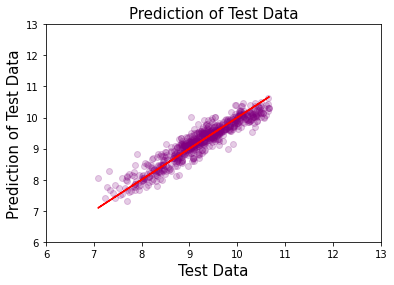

In [ ]:
plt.plot(y_test,y_test,color='red')
plt.title('Prediction of Test Data',fontsize=15)
plt.scatter(y_test,y_hat_test,color='purple',alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.xlabel('Test Data',fontsize=15)
plt.ylabel('Prediction of Test Data',fontsize=15)
plt.show()

In [ ]:
predict1 = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
predict1['Target'] = np.exp(y_test)
predict1

,Prediction,Target
0,13833.386403,15499.0
1,4503.455828,4300.0
2,2673.667915,2750.0
3,13461.997198,9555.0
4,3406.729029,3000.0
...,...,...
689,6264.120196,6000.0
690,12805.682107,14990.0
691,12975.944675,12000.0
692,16715.470191,22200.0


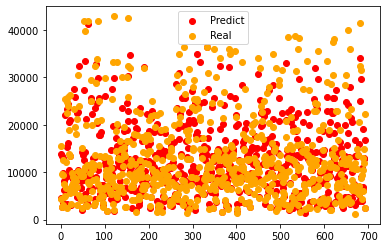

In [ ]:
plt.scatter(predict1.index,predict1['Prediction'],label='Predict',color='red')
plt.scatter(predict1.index,predict1['Target'],label='Real',color='orange')
plt.legend()

In [ ]:
predict1['Residual'] = predict1['Target'] - predict1['Prediction']
predict1['Difference%'] = np.absolute(predict1['Residual']/predict1['Target']*100)
predict1.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
321,5904.688788,5900.0,-4.688788,0.079471
68,24976.339770,25000.0,23.660230,0.094641
248,3102.366453,3099.0,-3.366453,0.108630
22,13380.600744,13400.0,19.399256,0.144771
574,3992.947105,3999.0,6.052895,0.151360
...,...,...,...,...
238,18169.406997,9599.0,-8570.406997,89.284373
148,6714.878557,2700.0,-4014.878557,148.699206
670,3104.446521,1200.0,-1904.446521,158.703877
218,3915.342170,1500.0,-2415.342170,161.022811


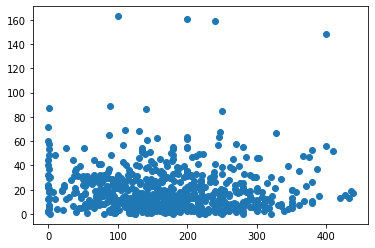

In [ ]:
plt.scatter(x_test['Mileage'],predict1['Difference%'])

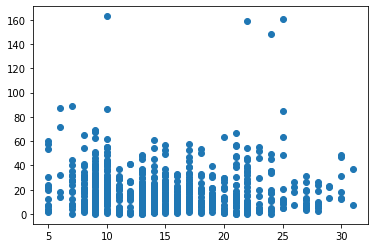

In [ ]:
plt.scatter(x_test['Age'],predict1['Difference%'])

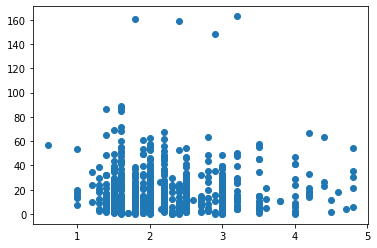

In [ ]:
plt.scatter(x_test['EngineV'],predict1['Difference%'])

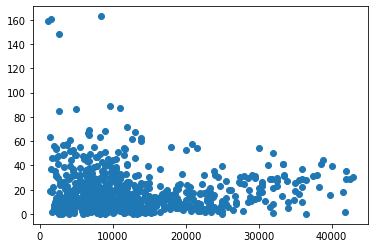

In [ ]:
plt.scatter(predict1['Target'],predict1['Difference%'])

In [ ]:
#Mape
predict1['Difference%'].mean()

19.373383873853637

## Modeling Eval 2
buang outlier dengan Common Sense


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size=0.2,random_state=0)
print('Train size:', x_train.shape)
print('Test size:', x_test.shape)

Train size: (3148, 20)
Test size: (787, 20)


In [ ]:
import statsmodels.api as sm

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train.drop(columns=['Mileage','EngineV','Age']))
result1 = sm.OLS(y_train,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1333.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:46:21   Log-Likelihood:                -746.98
No. Observations:                3148   AIC:                             1530.
Df Residuals:                    3130   BIC:                             1639.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.0075      0.025    360.378      0.000       8.959       9.057
Registration           0.9004      0.020     44.582      0.000       0.861       0.940
Brand_BMW              0.0915      0.017      5.248      0.000       0.057       0.126
Brand_Mitsubishi      -0.4762      0.024    -19.679      0.000      -0.524      -0.429
Brand_Renault         -0.6077      0.022    -27.579      0.000      -0.651      -0.565
Brand_Toyota          -0.2040      0.020    -10.367      0.000      -0.243      -0.165
Brand_Volkswagen      -0.2257      0.017    -13.381      0.000      -0.259      -0.193
Body_hatch            -0.3432      0.028    -12.242      0.000      -0.398      -0.288
Body_other            -0.2272      0.023     -9.891      0.000      -0.272      -0.182
Body_sedan            -0.2741      0.018    -15.618      0.000      -0.309      -0.240
Body_vagon            -0.3269      0.025    -13.142      0.000      -0.376      -0.278
Body_van              -0.4156      0.023    -18.260      0.000      -0.460      -0.371
Engine Type_Gas       -0.1198      0.019     -6.418      0.000      -0.156      -0.083
Engine Type_Other     -0.1035      0.036     -2.916      0.004      -0.173      -0.034
Engine Type_Petrol    -0.1053      0.015     -7.085      0.000      -0.134      -0.076
Mileage Scaled        -0.0920      0.008    -11.747      0.000      -0.107      -0.077
EngineV Scaled         0.2343      0.007     33.802      0.000       0.221       0.248
Age Scaled            -0.5328      0.008    -69.015      0.000      -0.548      -0.518
==============================================================================
Omnibus:                      323.751   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2504.933
Skew:                           0.119   Prob(JB):                         0.00
Kurtosis:                       7.364   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
independent.drop(columns=['Brand_Mercedes-Benz'],inplace=True)

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train.drop(columns=['Mileage','EngineV','Age']))
result1 = sm.OLS(y_train,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1449.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:28:14   Log-Likelihood:                -935.80
No. Observations:                3261   AIC:                             1906.
Df Residuals:                    3244   BIC:                             2009.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.1083      0.026    354.868      0.000       9.058       9.159
Registration           0.8967      0.021     42.373      0.000       0.855       0.938
Brand_BMW              0.0624      0.018      3.473      0.001       0.027       0.098
Brand_Mitsubishi      -0.4926      0.025    -19.620      0.000      -0.542      -0.443
Brand_Renault         -0.6502      0.023    -28.577      0.000      -0.695      -0.606
Brand_Toyota          -0.2406      0.020    -11.887      0.000      -0.280      -0.201
Brand_Volkswagen      -0.2519      0.017    -14.716      0.000      -0.285      -0.218
Body_hatch            -0.3682      0.029    -12.612      0.000      -0.425      -0.311
Body_other            -0.2762      0.023    -11.988      0.000      -0.321      -0.231
Body_sedan            -0.3351      0.018    -18.937      0.000      -0.370      -0.300
Body_vagon            -0.3672      0.025    -14.543      0.000      -0.417      -0.318
Body_van              -0.4683      0.023    -20.562      0.000      -0.513      -0.424
Engine Type_Gas       -0.1164      0.019     -6.028      0.000      -0.154      -0.079
Engine Type_Petrol    -0.0890      0.015     -5.990      0.000      -0.118      -0.060
Mileage Scaled        -0.0466      0.008     -6.039      0.000      -0.062      -0.032
EngineV Scaled         0.2256      0.007     32.138      0.000       0.212       0.239
Age Scaled            -0.5842      0.008    -74.862      0.000      -0.600      -0.569
==============================================================================
Omnibus:                      294.754   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.784
Skew:                           0.271   Prob(JB):                         0.00
Kurtosis:                       6.291   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
independent.drop(columns=['EngineV Scaled'],inplace=True)

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train.drop(columns=['Mileage','Age']))
result1 = sm.OLS(y_train,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     886.1
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:08:16   Log-Likelihood:                -1504.4
No. Observations:                3273   AIC:                             3047.
Df Residuals:                    3254   BIC:                             3163.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.0522      0.026    273.108      0.000       7.002       7.103
EngineV                 0.7824      0.003    264.576      0.000       0.777       0.788
Registration            0.9088      0.025     35.763      0.000       0.859       0.959
Brand_BMW               0.1029      0.027      3.838      0.000       0.050       0.156
Brand_Mercedes-Benz     0.1518      0.027      5.726      0.000       0.100       0.204
Brand_Mitsubishi       -0.6363      0.033    -19.256      0.000      -0.701      -0.572
Brand_Renault          -0.8097      0.031    -26.399      0.000      -0.870      -0.750
Brand_Toyota           -0.2530      0.030     -8.562      0.000      -0.311      -0.195
Brand_Volkswagen       -0.3479      0.026    -13.299      0.000      -0.399      -0.297
Body_hatch             -0.6635      0.033    -20.350      0.000      -0.727      -0.600
Body_other             -0.3623      0.027    -13.204      0.000      -0.416      -0.308
Body_sedan             -0.4721      0.020    -23.481      0.000      -0.511      -0.433
Body_vagon             -0.5056      0.029    -17.329      0.000      -0.563      -0.448
Body_van               -0.6105      0.026    -23.174      0.000      -0.662      -0.559
Engine Type_Gas        -0.0629      0.023     -2.751      0.006      -0.108      -0.018
Engine Type_Other      -0.0767      0.043     -1.773      0.076      -0.162       0.008
Engine Type_Petrol     -0.0462      0.018     -2.559      0.011      -0.082      -0.011
Mileage Scaled         -0.1094      0.010    -11.193      0.000      -0.129      -0.090
EngineV Scaled         -3.8124      0.014   -272.409      0.000      -3.840      -3.785
Age Scaled             -0.5512      0.010    -56.024      0.000      -0.570      -0.532
==============================================================================
Omnibus:                      716.138   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5442.306
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       9.095   Cond. No.                     4.60e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.88e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Prediction Eval 2

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train.drop(columns=['Mileage','EngineV','Age']),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat_test= reg.predict(x_test.drop(columns=['Mileage','EngineV','Age']))

In [ ]:
r2=reg.score(x_test.drop(columns=['Mileage','EngineV','Age']),y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8499773870675467

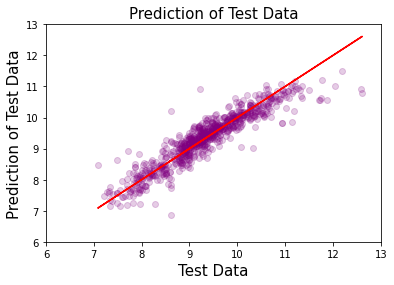

In [ ]:
plt.plot(y_test,y_test,color='red')
plt.title('Prediction of Test Data',fontsize=15)
plt.scatter(y_test,y_hat_test,color='purple',alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.xlabel('Test Data',fontsize=15)
plt.ylabel('Prediction of Test Data',fontsize=15)
plt.show()

In [ ]:
predict1 = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
predict1['Target'] = np.exp(y_test)
predict1

,Prediction,Target
0,11323.407381,11500.0
1,2380.528532,2800.0
2,11358.827422,9000.0
3,8450.700095,8400.0
4,4448.551004,4999.0
...,...,...
782,6747.934975,2800.0
783,24762.365234,27000.0
784,6232.901604,7000.0
785,11384.167826,7500.0


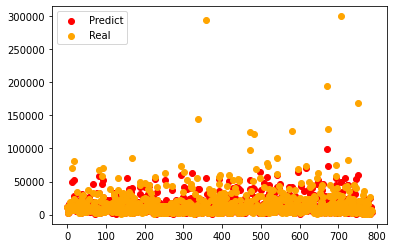

In [ ]:
plt.scatter(predict1.index,predict1['Prediction'],label='Predict',color='red')
plt.scatter(predict1.index,predict1['Target'],label='Real',color='orange')
plt.legend()

In [ ]:
predict1['Residual'] = predict1['Target'] - predict1['Prediction']
predict1['Difference%'] = np.absolute(predict1['Residual']/predict1['Target']*100)
predict1.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
360,8850.864158,8850.0,-0.864158,0.009764
422,2651.152947,2650.0,-1.152947,0.043507
28,16788.757113,16800.0,11.242887,0.066922
627,7906.265106,7900.0,-6.265106,0.079305
294,4490.798380,4500.0,9.201620,0.204480
...,...,...,...,...
31,5578.191962,1800.0,-3778.191962,209.899553
248,7429.075218,2250.0,-5179.075218,230.181121
327,4753.448397,1200.0,-3553.448397,296.120700
666,27518.572828,5500.0,-22018.572828,400.337688


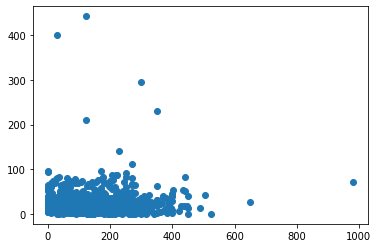

In [ ]:
plt.scatter(x_test['Mileage'],predict1['Difference%'])

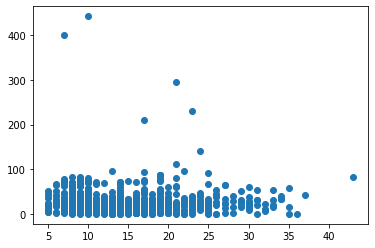

In [ ]:
plt.scatter(x_test['Age'],predict1['Difference%'])

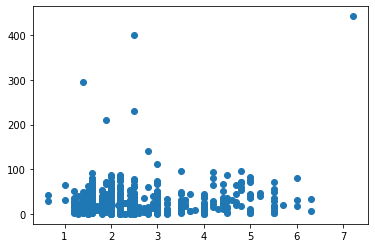

In [ ]:
plt.scatter(x_test['EngineV'],predict1['Difference%'])

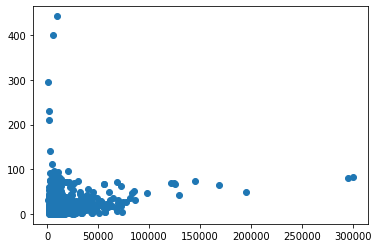

In [ ]:
plt.scatter(predict1['Target'],predict1['Difference%'])

In [ ]:
#Mape
predict1['Difference%'].mean()

24.917095136661285

In [ ]:
#Mape
predict1['Difference%'].mean()

21.75276142938819

## Modeling Evaluation 3


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size=0.2,random_state=0)
print('Train size:', x_train.shape)
print('Test size:', x_test.shape)

Train size: (3248, 21)
Test size: (812, 21)


In [ ]:
import statsmodels.api as sm

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train)
result2 = sm.OLS(y_train,x1).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1307.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:16:51   Log-Likelihood:                -924.52
No. Observations:                3248   AIC:                             1887.
Df Residuals:                    3229   BIC:                             2003.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8429      0.003    292.096      0.000       0.837       0.849
Mileage                 0.0153   9.42e-05    162.387      0.000       0.015       0.015
EngineV                 1.1838      0.004    295.105      0.000       1.176       1.192
Age                     0.1889      0.001    143.584      0.000       0.186       0.191
Registration            0.8976      0.021     41.929      0.000       0.856       0.940
Brand_BMW               0.0829      0.023      3.637      0.000       0.038       0.128
Brand_Mercedes-Benz     0.0478      0.022      2.130      0.033       0.004       0.092
Brand_Mitsubishi       -0.4892      0.028    -17.393      0.000      -0.544      -0.434
Brand_Renault          -0.6322      0.027    -23.810      0.000      -0.684      -0.580
Brand_Toyota           -0.2316      0.025     -9.265      0.000      -0.281      -0.183
Brand_Volkswagen       -0.2338      0.022    -10.441      0.000      -0.278      -0.190
Body_hatch             -0.3758      0.029    -12.919      0.000      -0.433      -0.319
Body_other             -0.2581      0.023    -11.067      0.000      -0.304      -0.212
Body_sedan             -0.3179      0.018    -17.756      0.000      -0.353      -0.283
Body_vagon             -0.3442      0.026    -13.467      0.000      -0.394      -0.294
Body_van               -0.4618      0.023    -19.854      0.000      -0.507      -0.416
Engine Type_Gas        -0.1161      0.019     -5.967      0.000      -0.154      -0.078
Engine Type_Other      -0.1034      0.036     -2.855      0.004      -0.174      -0.032
Engine Type_Petrol     -0.0910      0.015     -5.979      0.000      -0.121      -0.061
Mileage Scaled         -1.5069      0.005   -292.091      0.000      -1.517      -1.497
EngineV Scaled         -0.9196      0.006   -152.507      0.000      -0.931      -0.908
Age Scaled             -1.8272      0.006   -291.914      0.000      -1.840      -1.815
==============================================================================
Omnibus:                      306.703   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1752.091
Skew:                           0.248   Prob(JB):                         0.00
Kurtosis:                       6.564   Cond. No.                     2.74e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
independent.drop(columns=['Brand_Mercedes-Benz'],inplace=True)

## Prediction Evaluation 3

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat_test= reg.predict(x_test)

In [ ]:
r2=reg.score(x_test,y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8705135783861618

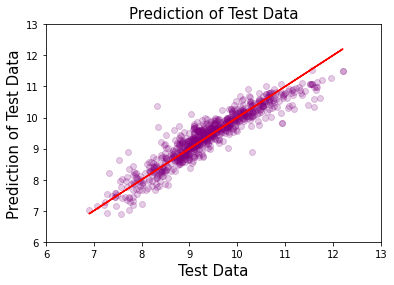

In [ ]:
plt.plot(y_test,y_test,color='red')
plt.title('Prediction of Test Data',fontsize=15)
plt.scatter(y_test,y_hat_test,color='purple',alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.xlabel('Test Data',fontsize=15)
plt.ylabel('Prediction of Test Data',fontsize=15)
plt.show()

In [ ]:
predict1 = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
predict1['Target'] = np.exp(y_test)
predict1

,Prediction,Target
0,25263.330778,27500.0
1,10868.972196,8300.0
2,34515.750458,28500.0
3,11169.068115,11500.0
4,9591.234911,15000.0
...,...,...
807,15757.109558,15900.0
808,27344.931314,27900.0
809,14412.065870,13200.0
810,16912.550687,9999.0


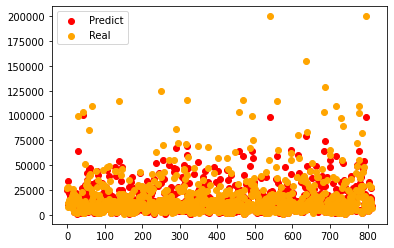

In [ ]:
plt.scatter(predict1.index,predict1['Prediction'],label='Predict',color='red')
plt.scatter(predict1.index,predict1['Target'],label='Real',color='orange')
plt.legend()

In [ ]:
predict1['Residual'] = predict1['Target'] - predict1['Prediction']
predict1['Difference%'] = np.absolute(predict1['Residual']/predict1['Target']*100)
predict1.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
528,7901.974973,7900.0,-1.974973,0.025000
20,2901.792738,2900.0,-1.792738,0.061819
98,12011.632457,11999.0,-12.632457,0.105279
717,20871.497465,20900.0,28.502535,0.136376
207,3990.269733,4000.0,9.730267,0.243257
...,...,...,...,...
146,24755.234672,8400.0,-16355.234672,194.705175
656,5655.470754,1850.0,-3805.470754,205.701122
86,7272.210960,2250.0,-5022.210960,223.209376
694,16301.242233,4200.0,-12101.242233,288.124815


In [ ]:
#Mape
predict1['Difference%'].mean()

24.959812417419915

Text(0.5, 1.0, 'Price and Age')

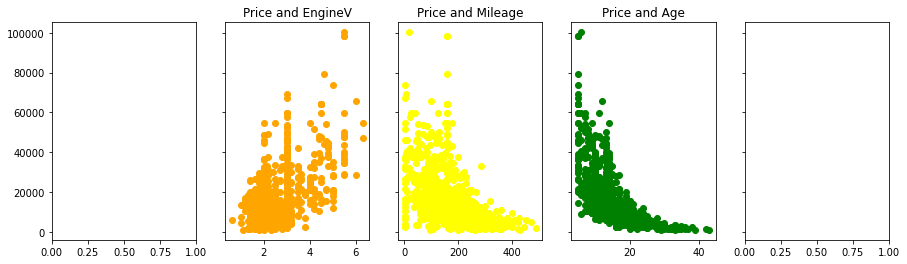

In [ ]:

fig, ax = plt.subplots(1, 5, sharey=True, figsize =(15,4))
ax[1].scatter(x_test['EngineV'],predict1['Prediction'],color='orange')
ax[1].set_title('Price and EngineV')
ax[2].scatter(x_test['Mileage'],predict1['Prediction'],color='yellow')
ax[2].set_title('Price and Mileage')
ax[3].scatter(x_test['Age'],predict1['Prediction'],color='green')
ax[3].set_title('Price and Age')

## Modeling Evaluation 4

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size=0.2,random_state=0)
print('Train size:', x_train.shape)
print('Test size:', x_test.shape)

Train size: (2774, 7)
Test size: (694, 7)


In [ ]:
import statsmodels.api as sm

In [ ]:
#model yang belum dibuang outliernya
x1 = sm.add_constant(x_train)
result2 = sm.OLS(y_train,x1).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2496.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:07:34   Log-Likelihood:                -903.27
No. Observations:                2774   AIC:                             1817.
Df Residuals:                    2769   BIC:                             1846.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6536      0.002    313.211      0.000       0.650       0.658
Mileage            0.0130      0.000    123.550      0.000       0.013       0.013
EngineV            1.1086      0.004    270.721      0.000       1.101       1.117
Registration       0.7759      0.022     35.486      0.000       0.733       0.819
Age                0.2129      0.001    154.889      0.000       0.210       0.216
Mileage Scaled    -1.2370      0.004   -313.207      0.000      -1.245      -1.229
EngineV Scaled    -0.5218      0.005   -104.908      0.000      -0.532      -0.512
Age Scaled        -1.6583      0.005   -307.711      0.000      -1.669      -1.648
==============================================================================
Omnibus:                       84.465   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.524
Skew:                          -0.248   Prob(JB):                     5.60e-33
Kurtosis:                       4.020   Cond. No.                     2.86e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
independent.drop(columns=['Engine Type_Other','Brand_Mercedes-Benz'],inplace=True)

KeyError: ignored

## Prediction Evaluation 4

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat_test= reg.predict(np.exp(x_test))

In [ ]:
r2=reg.score(x_test,y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8092035102083244

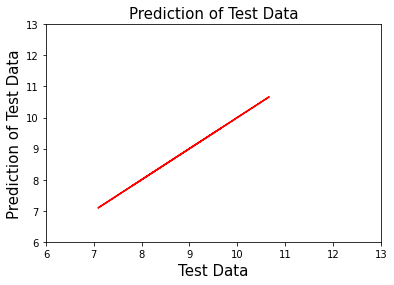

In [ ]:
plt.plot(y_test,y_test,color='red')
plt.title('Prediction of Test Data',fontsize=15)
plt.scatter(y_test,y_hat_test,color='purple',alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.xlabel('Test Data',fontsize=15)
plt.ylabel('Prediction of Test Data',fontsize=15)
plt.show()

In [ ]:
predict1 = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
predict1['Target'] = (y_test)
predict1

,Prediction,Target
0,0.0,9.648531
1,0.0,8.366370
2,0.0,7.919356
3,0.0,9.164820
4,0.0,8.006368
...,...,...
689,0.0,8.699515
690,0.0,9.615139
691,0.0,9.392662
692,0.0,10.007848


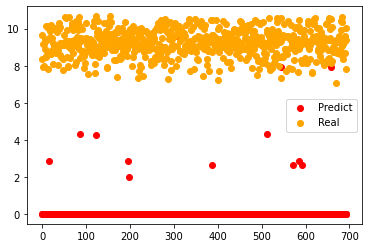

In [ ]:
plt.scatter(predict1.index,predict1['Prediction'],label='Predict',color='red')
plt.scatter(predict1.index,predict1['Target'],label='Real',color='orange')
plt.legend()

In [ ]:
predict1['Residual'] = predict1['Target'] - predict1['Prediction']
predict1['Difference%'] = np.absolute(predict1['Residual']/predict1['Target']*100)
predict1.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
304,9.625759,10.140226,0.514467,5.073524
658,7.911523,10.491274,2.579751,24.589491
543,7.911523,10.551454,2.639931,25.019594
513,4.292874,9.945548,5.652674,56.836225
87,4.297769,10.126631,5.828862,57.559735
...,...,...,...,...
236,0.000000,9.210340,9.210340,100.000000
237,0.000000,9.862666,9.862666,100.000000
238,0.000000,9.169414,9.169414,100.000000
230,0.000000,7.438384,7.438384,100.000000


In [ ]:
#Mape
predict1['Difference%'].mean()

99.19047920456792